# Critérios de Falha com Simulação Monte Carlo

Este exemplo contempla o cálculo do Fator de Segurança com os critérios de Tresca e Von Mises, assumindo que uma das tensões do Tensor de Cauchy é uma variável aleatória e aplicando propagação de incertezas com Simulação Monte Carlo.

## Carregar as bibliotecas necessárias

In [153]:
import numpy as np
import pandas as pd
import math as mt
import scipy.linalg as la
from numpy import linalg as la
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as font_manager
from matplotlib import rc

# Set the font dictionaries (for plot title and axis titles)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'],'size': '12'})
rc('text', usetex=True)

## Definindo as tensões 
<ul>
                <li>Assumimos que $\sigma_x=90$ MPa, $\sigma_y=100$ MPa e $\sigma_z=0$ MPa, e que a tensão de cisalhamento $\mathbb{\tau}_{xy}$ é uma variável aleatória que pode ter uma distribuição uniforme com $\tau_{min}=50$ MPa e $\tau_{max}=130$ MPa, ou uma distribuição Gamma com média de 85 MPa. Assim o tensor da tensões é:

$$\mathbf{\sigma}=\begin{bmatrix} \sigma_x & \mathbb{\tau}_{xy} & 0 \\ \mathbb{\tau}_{xy} & \sigma_y & 0 \\ 0 & 0 & \sigma_z \end{bmatrix}$$</li>
    <li>Nmc = 1000 é o número de amostras para a simulação Monte Carlo.</li>
<li>$\sigma_e=250$ MPa é a tensão de escoamento do Material</li>
</ul>

In [154]:
Sx = 90
Sy = 100
Sz = 0
Se = 250
Sxy_m = 85
Sxy_min = 50
Sxy_max = 130
Nmc =1000         # numero de amostras MC
np.random.seed(1978)

# Tensão de cisalhamento tem uma distribuição uniforme
#Sxy=np.random.uniform(Sxy_min,Sxy_max,Nmc).round(2) 

# Tensão de cisalhamento tem uma distribuição Gamma
b = 2
beta = 1/b
a = Sxy_m*beta
Sxy=np.random.gamma(a,b,Nmc).round(2) 

A tensão de cisalhamento $\tau_{xy}$ tem uma distribuição mostrada abaixo:

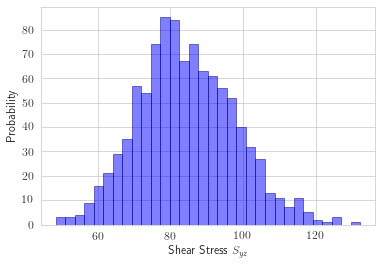

In [155]:
plt.figure()
sns.set_style("whitegrid")
plt.hist(Sxy, bins=mt.ceil(np.sqrt(Nmc)), alpha=0.5, color = 'b',edgecolor = 'darkblue' ) 
plt.ylabel('Probability')
plt.xlabel('Shear Stress $S_{yz}$');
#plt.savefig('hist_Szy.eps', format='eps')
plt.savefig('hist_Szy.pdf')
plt.show()

Iniciando a simulação de Monte Carlo e calculando as tensões principais em cada passo, e aplicando os critérios de Tresca e Von Mises:

In [156]:
SF_tresca=[]
SF_vm=[]

for i in range(Nmc):
    # Tensor das Tensões
    S = np.array([[Sx, Sxy[i],0],[Sxy[i], Sy,0],[0,0,Sz]])
    # tensões principais em eigvals e direções princiapis en eigvecs
    eigvals, eigvecs = la.eig(S)
    # Tensão máxima e mínima, respectivamente
    S1 = np.amax(eigvals)
    S3 = np.amin(eigvals)
   
    # Fator de segurança pelo critério de Tresca    
    SF_tresca.append(Se/(S1-S3))

    # Tensão de Von Mises para tensões principais
    sp =  sorted(eigvals,reverse=True) # ordenando autovalores 
    aux=(sp[0]-sp[1])**2 +(sp[1]-sp[2])**2 +(sp[2]-sp[0])**2
    Svm = np.sqrt(aux/2)
   
    # Fator de segurança pelo critério de Von Mises    
    SF_vm.append(Se/Svm)
    

Fator de segurança é uma variável aleatória com uma distribuição de probabilidade:

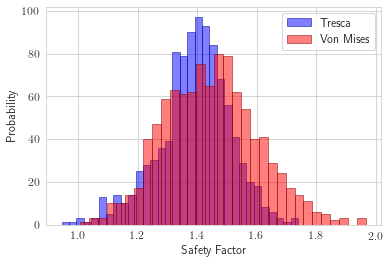

In [160]:
SF_tresca = np.array(SF_tresca, dtype=np.float32) # converter uma list em um array
SF_vm = np.array(SF_vm, dtype=np.float32) # converter uma list em um array

plt.figure()
sns.set_style("whitegrid") #darkgrid
plt.hist(SF_tresca, bins=mt.ceil(np.sqrt(Nmc)), alpha=0.5, label='Tresca',color = 'b',edgecolor = 'darkblue')
plt.hist(SF_vm, bins=mt.ceil(np.sqrt(Nmc)), alpha=0.5, label='Von Mises',color = 'r',edgecolor = 'darkred')
plt.ylabel('Probability')
plt.xlabel('Safety Factor');
plt.legend(loc='upper right')
#plt.savefig('FS.eps', format='eps')
plt.savefig('FS.pdf')
plt.show()

Verificando se o número de amostras usadas no MC garantem convergência da simulação:

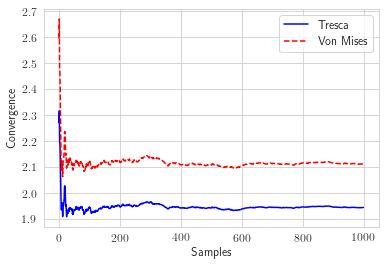

In [161]:
arr=np.array(list(range(1,Nmc+1)))
converge_tresca =np.cumsum(SF_tresca**2)/arr
converge_vm =np.cumsum(SF_vm**2)/arr

plt.figure()
sns.set_style("whitegrid") # "whitegrid"
plt.plot(converge_tresca,label='Tresca',color = 'b')
plt.plot(converge_vm, label='Von Mises',color = 'r',linestyle='dashed')
plt.ylabel('Convergence')
plt.xlabel('Samples')
plt.legend(loc='upper right')
#plt.savefig('converge.eps', format='eps')
plt.savefig('converge.pdf')
plt.show()

Para saber mais detalhes:

<ul>
<li> Página do Curso de Mecânica dos Sólidos da UNESP/Solteira: <a href="https://www.samueldasilva.org/teaching/solid-mechanics">Link</a></li>
<li>Yanik, Yasar, Quantification of parametric uncertainties effects in structural failure criteria. M.Sc. Dissertation in Mechanical Engineering; <b>UNESP - São Paulo State University</b>, Ilha Solteira/SP, Brazil, 2019,   <a href="http://hdl.handle.net/11449/182040">Link</a>, para citar no BiBTeX:</li>,
</ul>

```
@phdthesis{Yanik2019,
  title={Quantification of parametric uncertainties effects in structural failure criteria},
  author={Yasar Yanik},
  year={2019},
    school ={Universidade Estadual Paulista (UNESP)}
      note= {M.Sc. in Mechanical Engineering}
  url = "http://hdl.handle.net/11449/182040",
}

```